# Lab 4:  Curve Fitting

## Jacob Skinner

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Part 1a.  Simple Line Fitting

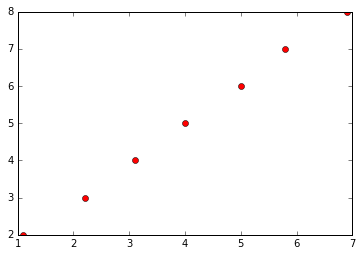

In [2]:
x=np.array([1.1,2.2,3.1,4.0,5.0,5.8,6.9])
y=np.array([2.0,3.0,4.0,5.0,6.0,7.0,8.0])
dely=np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1])
plt.plot(x,y,'ro')
plt.show()

Try a range of slopes and intercepts, and calculate $\chi^2$ values for each set.

In [3]:
m=np.arange(-1,4.0,0.1)
b=np.arange(-5.0,5.0,0.1)
chi2=np.zeros([m.size,b.size])
for i in range(m.size):
    for j in range(b.size):
        chi2[i,j]=sum(((y-m[i]*x-b[j])**2)/dely**2)

What is chi2?  What happens if you print it?  What does the minimum mean?  Where is the minimum?  What happens if you plot it...

chi2 is an array of floating point values. It's instantiated as an array of zeroes, it is passed parameter values from the elements of the m and b arrays; these are used to calculate the $\,\chi^2$ value for resulting from the choice of the two parameters.

The minimum is the value of $\,\chi^2$ which is most likely to fit our data. The m and b that result are thus the parameter values of the line which is our best fit.

In [4]:
np.unravel_index(np.argmin(chi2), (m.size,b.size)) # What does this line do?

print("(21, 56)","\nChi^2 =",chi2[21][56], "\nm[21] =",m[21], "\nb[56] =",b[56])

(21, 56) 
Chi^2 = 8.31 
m[21] = 1.1 
b[56] = 0.6


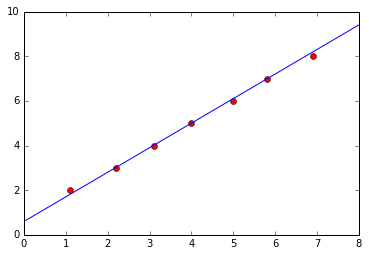

In [5]:
plt.plot(x,y,'ro')
xNew = np.linspace(0,8, num=9)
plt.plot(xNew,xNew*m[21]+b[56])
plt.show()

#here we see that what we've expected to be the best fit doesn't look obviously wrong at a glance; encouraging.

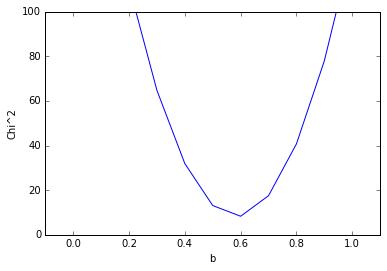

In [6]:
plt.plot(b,chi2[21,:])
plt.ylim(0,100)
plt.xlim(-0.1,1.1)
plt.xlabel("b")
plt.ylabel("Chi^2")
plt.show()

#this plot shows the changing value of chi2 if m is held constant at 21, and b is varied.

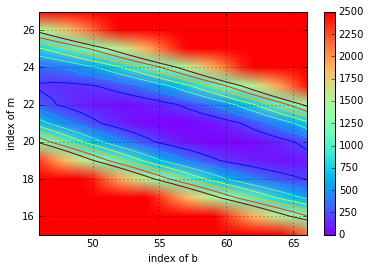

In [7]:
#contour code courtesy of your demo

plt.imshow(chi2,vmin=0,vmax=2500,cmap='rainbow',aspect='auto')
plt.colorbar()
plt.contour(chi2,levels=np.arange(0,1500,200))
plt.xlim(46,66)
plt.xlabel("index of b")
plt.ylim(15,27)
plt.ylabel("index of m")
plt.grid(True)
plt.show()

#we have a visual view of how chi2 varies in the parameter space
#the pixellation does make it a bit bad.

Using the tools above and similar, find the slope and intercept that minimize $\chi^2$.  Answer each of the following questions:

* What are the $m$ and $b$ values that minimize $\chi^2$?
* What uncertainties do you estimate for $m$ and $b$?  Explain your reasoning.
* Are the values of $m$ and $b$ related?  Carefully explain what this means.

Explore!  All "what if" explorations will receive additional credit.

When $\,\chi^2$ is minimized, $m=1.1$ and $b=0.6$. For these parameter values, $\,\chi^2=8.3$

To find the Uncertainty values in m and b I turn to chapter 8 of our textbook. The section on least squares fitting lays out some helpful formulae for determining the uncertainties in our least squares fit parameters.

$$\sigma_m=\sigma_y\sqrt{\frac{N}{\Delta}}$$
<center>and</center></h1>

$$\sigma_b=\sigma_y\sqrt{\frac{\sum{x^2}}{\Delta}}$$
<center>where</center>

$$\sigma_y=\sqrt{\frac{1}{N-2}\sum_{i=1}^{N} {(y_i-b-mx_i)^2}}$$
<center>and</center>

$$\Delta=N\sum{x^2}-(\sum{x})^2$$

So when we make the substitutions, the equations become

$$\sigma_m=\sqrt{N}\sqrt{\frac{1}{N-2}\sum_{i=1}^{N} {(y_i-b-mx_i)^2}}\frac{1}{\sqrt{N\sum{x^2}-(\sum{x})^2}}$$
<center>and</center>

$$\sigma_b=\sqrt{\sum{x^2}}\sqrt{\frac{1}{N-2}\sum_{i=1}^{N} {(y_i-b-mx_i)^2}}\frac{1}{\sqrt{N\sum{x^2}-(\sum{x})^2}}$$

Now to perform the calculation.

$$\frac{1}{\sqrt{\Delta}}=0.07543$$

$$\sqrt{\frac{1}{N-2}\sum_{i=1}^{N} {(y_i-b-mx_i)^2}}=0.12892$$


$$\sigma_m=\sqrt{7}\bullet0.12892\bullet0.07543=0.026$$

$$\sigma_b=\sqrt{137.91}\bullet0.12892\bullet0.07543=0.114$$

The values of m and b are indeed related. There is a negative covariance visible in the contour plot of the parameter space. i.e. We can keep $\,\chi^2$ low if we raise one parameter and lower the other, or vice versa. Raising or lowering each parameter together is the fastest way to raise $\,\chi^2$.

It may be possible to demonstrate covariance by pointing to the "trough" that the long axis of the contour shows. The line it makes in the $mb$ plane is the line of minimized values for $\,\chi^2$, this line corresponds to the vertices of the quadratic curves that appear in the $m-\chi^2$ and $b-\chi^2$ planes.

If I remember my multivariable calculus correctly, $\,\chi^2$ is a function of $m$ and $b$.

What we see is that there exists a line of coordinates, $m(b)$, for which:

$$\frac{\partial\chi^2}{\partial m}=\frac{\partial\chi^2}{\partial b}=0$$

The existence of this line is direct evidence of the covariance of m and b.

## Part 1b.  Using Built-in Functions and Interpreting Results

In [8]:
np.polyfit(x, y, 1, cov=True)

(array([ 1.05541648,  0.76325671]), array([[ 0.0004177 , -0.00167676],
        [-0.00167676,  0.00822924]]))

Consult the internet to "reverse engineer" what is going on in the example here. Carefully explain all the outputs of the cell above.

The first array consists of the fit parameters that were calculated from x and y. Since the function was fed a polynomial degree argument of 1, there are two parameters returned.

Because cov was set to true, the other output is the covariance matrix for the parameters. The values on the main diagonal are the variance estimates for each parameter.

$$\left| \begin{array}{cc}
 0.0004177 & -0.00167676 \\
 -0.00167676 & 0.00822924 \end{array} \right|$$

## Part 2a.  Fitting Other Curves

Now repeat the exercise by fitting a Gaussian distribution to the data below, perhaps representing results from one of our previous labs.

In [9]:
x=np.array([95.,96.,97.,98.,99.,100.,101.,102.,103.])
yraw=np.array([1.,2.,3.,4.,5.,6.,5.,4.,3.])
y=yraw/(np.sum(yraw))

In [10]:
# x=np.random.normal(loc=100.,scale=10.,size=1000)
# hist, bin_edges = np.histogram(x, density=True)
# bin_centers = (bin_edges[:-1] + bin_edges[1:])/2

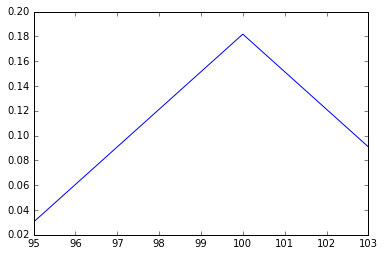

In [11]:
plt.plot(x,y)
plt.show()

In [12]:
def gauss(x, *p):
    mu, sigma = p
    return (1/(sigma*2.506))*np.exp(-(x-mu)**2/(2.*sigma**2))

In [13]:
mean=np.arange(98.,102.,0.01)
sig=np.arange(1.0,6.0,0.01)
chi2=np.zeros([mean.size,sig.size])
for i in range(mean.size):
    for j in range(sig.size):
        chi2[i,j]=sum(((y-(np.exp(-((x-mean[i])**2)/(2.0*(sig[j])**2)))/(sig[j]*np.sqrt(2.0*np.pi)))**2)/1.0**2)

In [14]:
meanfit,sigfit=np.unravel_index(np.argmin(chi2), (mean.size,sig.size))
print(mean[meanfit])
print(sig[sigfit])
print(chi2[meanfit][sigfit])

99.92
2.42
0.00114131330978


$\chi^2$ is minimized at $\sigma=2.42$ and $\bar{x}=99.92$

The uncertainty in the mean is given by: $$\delta \bar{x}=\frac{1}{\sqrt{N}}=\frac{1}{\sqrt{9}}=0.333$$

I've had a hard time trying to find the uncertainty in sigma, unfortunately. Using propagation of error blows it up since each of the nine terms must have their own partial derivatives calculated.

There is no obvious covariance between the mean and the standard deviation, As we can see by the argument in the previous section. There is no single line for which $\frac{\partial^2\chi^2}{\partial m^2}=\frac{\partial^2\chi^2}{\partial b^2}=0$.

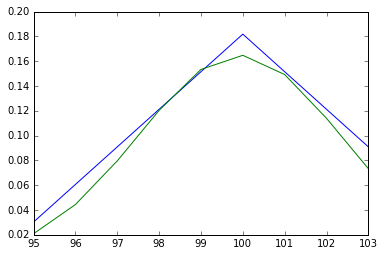

In [15]:
plt.plot(x,y)
plt.plot(x,(np.exp(-((x-mean[meanfit])**2)/(2.0*(sig[sigfit])**2)))/(sig[sigfit]*np.sqrt(2.0*np.pi)))
plt.show()

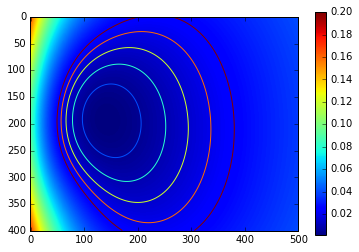

In [16]:
plt.imshow(chi2,vmax=.2)
plt.colorbar()
plt.contour(chi2,levels=np.arange(0,.03,.005))
plt.show()

## Part 2b: Using Built-in Tools and Interpreting Results

In [20]:
from scipy.optimize import curve_fit #import necessary libraries

In [21]:
x=np.random.normal(loc=100.,scale=10.,size=1000)
#create a random array of 1000 normally distribruted entries

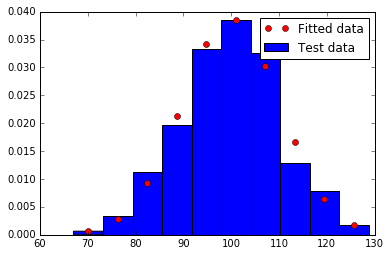

In [23]:
hist, bin_edges = np.histogram(x, density=True)#create a histogram to plot
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Define model function to be used to fit to the data:
def gauss(x, *p):
    mu, sigma = p
    return (1/(sigma*2.506))*np.exp(-(x-mu)**2/(2.*sigma**2))

# Choose initial guess:
p0 = [130., 20.]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
#the above line instantiates variables returned by the gauss function, a coefficient array and
#a matrix of 'y values' lined up with the bin centers.

hist_fit = gauss(bin_centres, *coeff) #creates the y values for the fit, in a form ready to plot

plt.hist(x,normed=True, label='Test data')
plt.plot(bin_centres, hist_fit, 'ro',label='Fitted data')
plt.legend()
plt.show()
#the above code is plotting code we've seen several times now

In [24]:
print("Coefficients output =", coeff)
print("Variance matrix output =", var_matrix)

Coefficients output = [ 99.90249803  10.31748838]
Variance matrix output = [[  1.77100004e-01   1.35298159e-04]
 [  1.35298159e-04   1.18324942e-01]]


Consult the internet to "reverse engineer" what is going on in the example here.  Put comments in the code (using #) to explain what is happening in most of the lines.  You should have enough comments such that you could use this to fit your own data with your own function.

Carefully explain what the printed outputs mean.  Hint:  What is the significance of the next cell's output?

The "Coefficients output" is the parameters of the gaussian fit, first the mean, then the standard deviation. The next output is the variance matrix, showing the best estimates for the variance coefficients of each parameter.

In [26]:
print(np.sqrt(np.diag(var_matrix)))

[ 0.42083251  0.34398393]


The printed output above is the square roots of the entries down the diagonal of var_matrix